## Boston housing RF and Boosting 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

### Loading of the data
Load the Boston Housing data set via:

In [2]:
boston = datasets.load_boston()
np.random.seed(42) #For reproducable splits of the data
X, y_ = shuffle(boston.data, boston.target, random_state=42)
np.min(y_),np.max(y_) 

(5.0, 50.0)

In [3]:
boston.data.shape

(506, 13)

### Splitting the data / creation of catgeorical data

The variable `y` is a numerical variable ranging from 5 to 50. For classification one needs first to transform it into a categorical variable. 

a) Transform the numerical variable into a 0,1 variable by assiging all values, which are larger than the the median to 1 the rest to 0. Split the data randomly into a training set 90 percent and a test set. 

In [4]:
### <---- Your code here -------->
y = np.zeros_like(y_, dtype='int32')
y[y_ > np.median(y_)] = 1

X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

b) Train a random forest with 100 trees on the training data set and calculte the OOB-Error. Calculate the error on the test set.

In [5]:
### <---- Your code here -------->
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators=500, oob_score=True)
rf.fit(X_train,y_train)
rf.oob_score_

0.87692307692307692

In [6]:
np.mean(rf.predict(X_test) == y_test)

0.88235294117647056

c) Train a gradient boosting classificator similar to b). Use `clf = ensemble.GradientBoostingClassifier` and the exponential loss for Adaboost.

In [7]:
n_estimators  = 1000   # Number of steps, same as number of trees B. Start with 1000
learning_rate =  0.1  # The shrinkage parameter lambda start with 0.1
max_depth = 1         # The number of splits in each tree

#clf = ensemble.GradientBoostingClassifier(...
### <---- Your code here -------->
clf = ensemble.GradientBoostingClassifier(n_estimators=n_estimators, 
                                          learning_rate=learning_rate, 
                                          loss='exponential', 
                                          max_depth=max_depth)
clf.fit(X_train, y_train)
np.mean(clf.predict(X_test) == y_test), np.mean(clf.predict(X_train) == y_train)

(0.84313725490196079, 0.96483516483516485)

d) Optimize the parameters of the gradient boosting classifier. You might use the following code to monitor the loss during training. Keep max_depth constant and vary the learning rate and n_estimators. You should get a accuracy on the training set of of about > 90%.

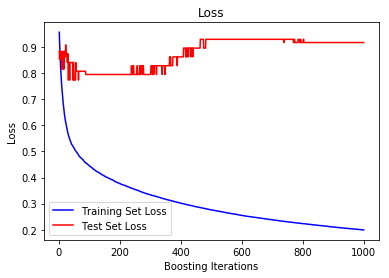

In [8]:
# compute test set deviance
test_score = np.zeros((n_estimators,), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.title('Loss')
plt.plot(np.arange(n_estimators)+1, clf.train_score_, 'b-',
         label='Training Set Loss')
plt.plot(np.arange(n_estimators) + 1, test_score, 'r-',
         label='Test Set Loss')
plt.legend(loc='lower left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Loss')

### Optional 

e) The importance of feature can be displayed as follows.

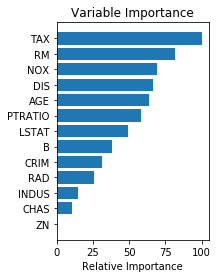

In [9]:
feature_importance = clf.feature_importances_
#feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Train a boosting regressor [optional]

f) Boosting can also be used for regression by using regression trees. A typical loss would be the least square loss (loss = 'ls'). Fit ensemble.GradientBoostingRegressor with loss='ls' to the training data. Do a prediction on the test set and calculate the mean squarred error on the training data.   

In [10]:
y_train_num = y_[:offset]
y_test_num = y_[offset:]

In [11]:
# <-- Your code here 
clf = ensemble.GradientBoostingRegressor(n_estimators=n_estimators, 
                                          learning_rate=learning_rate, 
                                          loss='ls', 
                                          max_depth=max_depth)

clf.fit(X_train, y_train_num)
y_hat = clf.predict(X_test)
mse = np.mean((y_hat - y_test_num)**2)
# <-- Your code here 

print("MSE: %.4f" % mse)

MSE: 12.3311


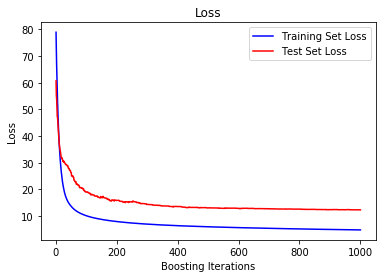

In [12]:
# compute test set deviance
test_score = np.zeros((n_estimators,), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test_num, y_pred)

plt.title('Loss')
plt.plot(np.arange(n_estimators)+1, clf.train_score_, 'b-',
         label='Training Set Loss')
plt.plot(np.arange(n_estimators) + 1, test_score, 'r-',
         label='Test Set Loss')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Loss')

### Comparison with linear regression

In [13]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train_num)
y_hat = reg.predict(X_test)
mse = np.mean((y_hat - y_test_num)**2)
print("MSE: %.4f" % mse)

MSE: 26.3274
